In [181]:
import ruptures as rpt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [182]:
df = pd.read_csv('aapl_2021_2023.csv')
df.columns = df.columns.str.strip() 
df.pop("C_DELTA")
df.pop("C_GAMMA")
df.pop("C_VEGA")
df.pop("C_THETA")
df.pop("C_RHO")
df.pop("C_VOLUME")
df70filter = df.STRIKE == 70.0 
df70 = df[df70filter]
df70filter = df70.EXPIRE_DATE.str.contains('2023') # Change this filter to change the month
df70 = df70[df70filter]
df70.sort_values(by="DTE") 
df70.drop_duplicates(subset=[df70.columns[6]])
df70 = df70[df70 != " "].dropna(axis=0)
df70["C_BID"] = pd.to_numeric(df70["C_BID"])
df70["C_IV"] = pd.to_numeric(df70["C_IV"])
df70['QUOTE_DATE'] = pd.to_datetime(df70['QUOTE_DATE'], format = '%Y-%m-%d')
df70 = df70.sort_values(by = "QUOTE_DATE")
df70.index = range(len(df70))
df.head(50)
df70

/var/folders/xz/p8m06xr55dv4n40tlgm3jl880000gn/T/ipykernel_27154/863269084.py:1: DtypeWarning: Columns (14,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('aapl_2021_2023.csv')


,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_IV,C_LAST,C_SIZE,C_BID,C_ASK,STRIKE,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
0,1609794000,2021-01-04 16:00,2021-01-04,129.45,2023-03-17,1679083200,801.96,0.40312,65.0,8 x 60,63.51,64.15,70.0,59.4,0.459
1,1609794000,2021-01-04 16:00,2021-01-04,129.45,2023-01-20,1674248400,746.00,0.39221,66.5,98 x 236,62.50,63.65,70.0,59.4,0.459
2,1609880400,2021-01-05 16:00,2021-01-05,130.95,2023-03-17,1679083200,800.96,0.40716,65.7,274 x 455,63.94,66.65,70.0,60.9,0.465
3,1609880400,2021-01-05 16:00,2021-01-05,130.95,2023-01-20,1674248400,745.00,0.39743,66.5,10 x 2,64.01,65.15,70.0,60.9,0.465
4,1609966800,2021-01-06 16:00,2021-01-06,126.66,2023-03-17,1679083200,799.96,0.40683,64.32,107 x 170,59.85,62.95,70.0,56.7,0.447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065,1680292800,2023-03-31 16:00,2023-03-31,164.84,2023-04-06,1680811200,6.00,4.42831,0.0,90 x 1,94.30,95.9,70.0,94.8,0.575
3066,1680292800,2023-03-31 16:00,2023-03-31,164.84,2023-03-31,1680292800,0.00,16.15260,0.0,90 x 90,93.55,96.25,70.0,94.8,0.575
3067,1680292800,2023-03-31 16:00,2023-03-31,164.84,2023-12-15,1702674000,259.04,0.58767,78.68,1 x 7,94.90,98.55,70.0,94.8,0.575
3068,1680292800,2023-03-31 16:00,2023-03-31,164.84,2023-05-12,1683921600,42.00,1.27480,0.0,7 x 3,93.20,97.15,70.0,94.8,0.575


# Structural breaks

Text(0.5, 0, 'Quote date')

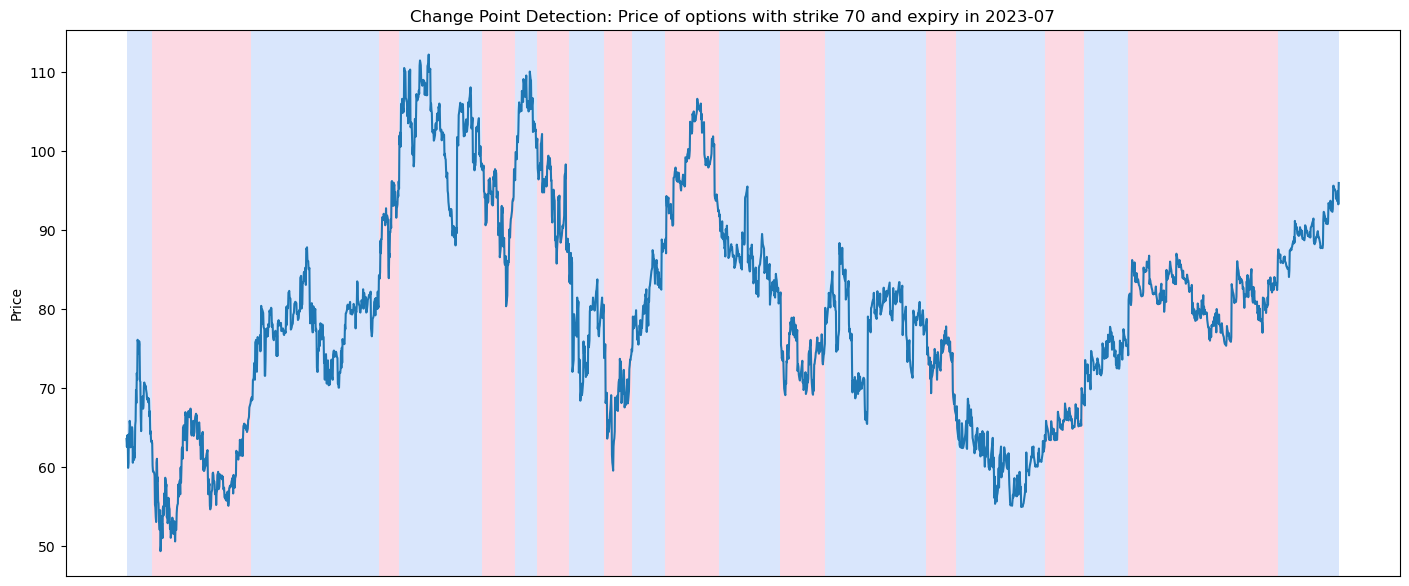

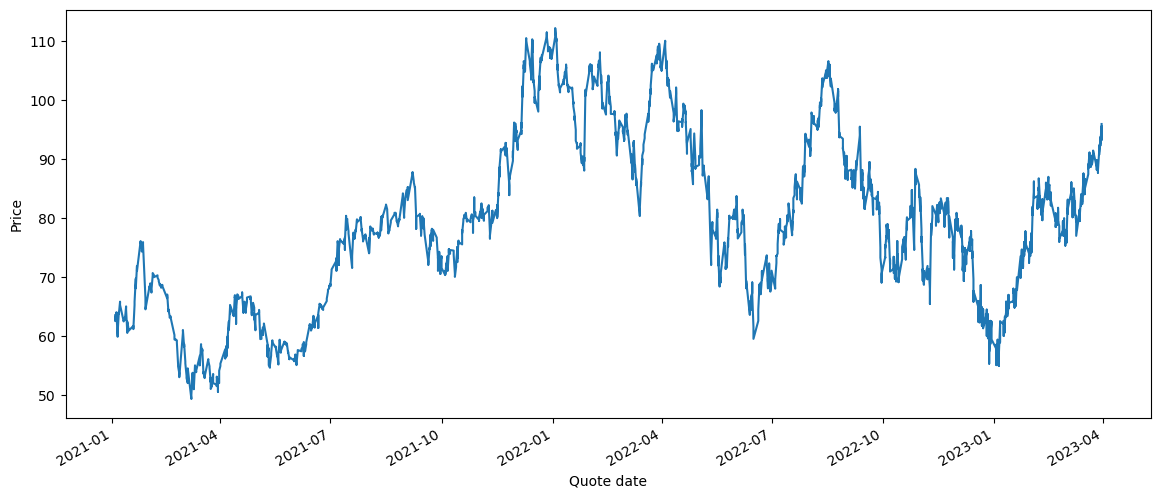

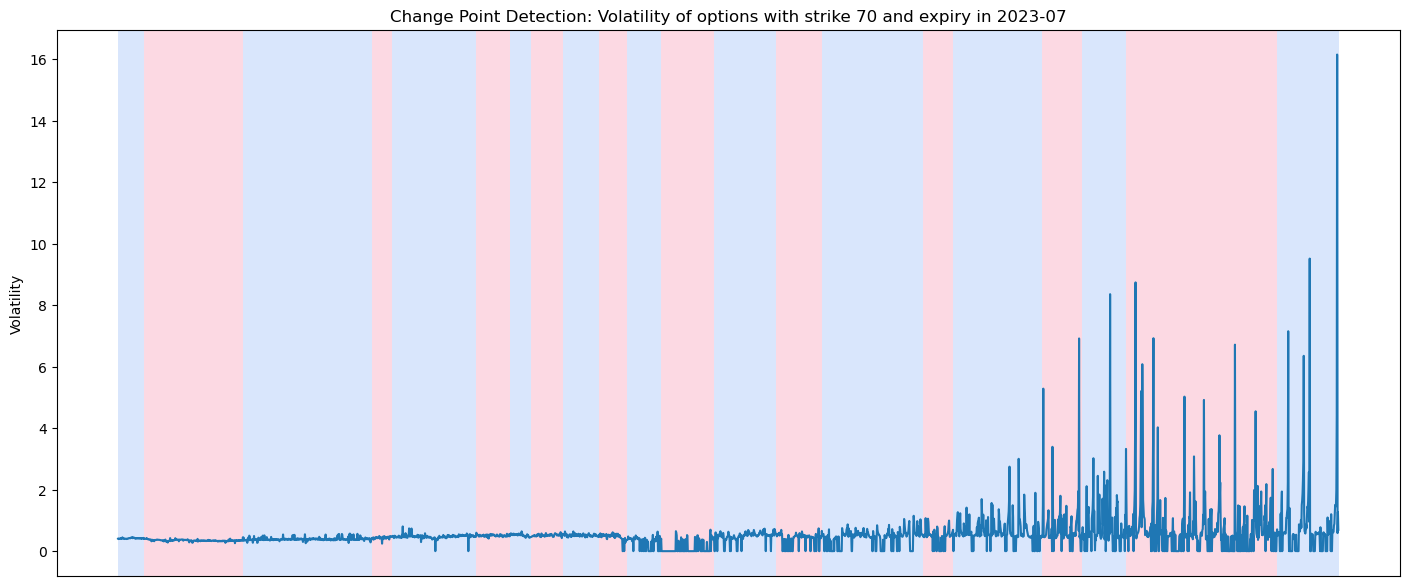

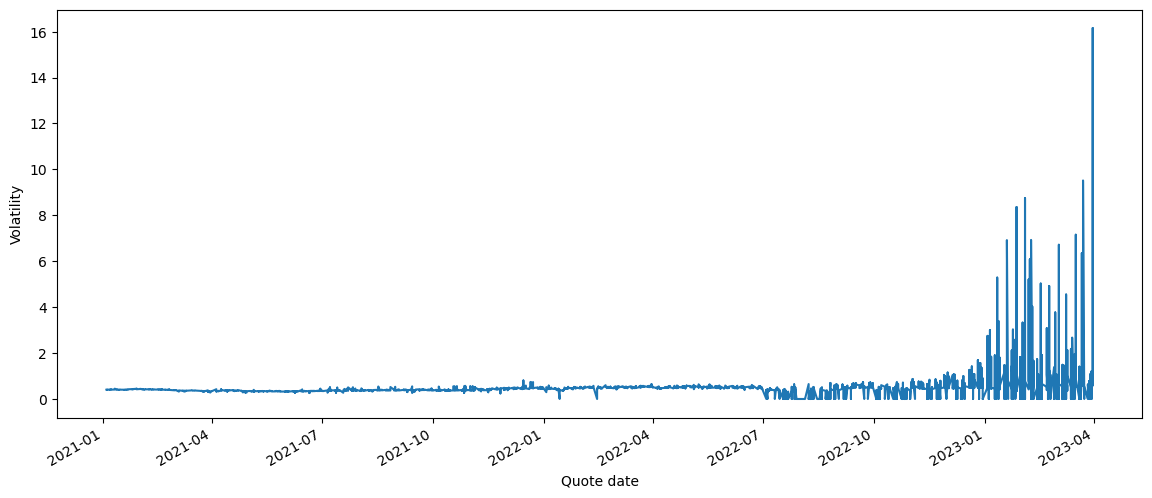

In [183]:
# Preprocessing
points=np.array(df70['C_BID'])
dates = np.array(df70['QUOTE_DATE'])


'''Other potential models for finding change points.'''
# model="rbf"
# algo = rpt.Pelt(model=model).fit(points)
# result = algo.predict(pen=10)
# rpt.display(points, result, figsize=(10, 6))
# plt.title('Change Point Detection: Pelt Search Method')
# plt.show()  
# print(result) 
# print(len(points))
# df70.plot(x=df70.columns[2], y=df70.columns[7], kind='line', figsize=(50, 20))	
# plt.title('Implied_Volatility Plot')

# model = "l2"  
# algo = rpt.Binseg(model=model).fit(points)
# my_bkps = algo.predict(n_bkps=10)
# # show results
# rpt.show.display(points, my_bkps, figsize=(10, 6))
# plt.title('Change Point Detection: Binary Segmentation Search Method')
# plt.show()
# print(my_bkps)
# df70.plot(x=df70.columns[2], y=df70.columns[7], kind='line', figsize=(50, 20))	
# plt.title('Implied_Volatility Plot')

# model = "l2"  
# algo = rpt.Window(width=40, model=model).fit(points)
# my_bkps = algo.predict(n_bkps=10)
# rpt.show.display(points, my_bkps, figsize=(10, 6))
# plt.title('Change Point Detection: Window-Based Search Method')
# print(my_bkps)
# df70.plot(x=df70.columns[2], y=df70.columns[7], kind='line', figsize=(50, 20))	
# plt.title('Implied_Volatility Plot')





# Finding structural breaks
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=20)

# Plotting complementary curves
rpt.show.display(points, my_bkps, figsize=(14, 6))
plt.ylabel("Price")
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

plt.title('Change Point Detection: Price of options with strike 70 and expiry in 2023-07')
df70.plot(x=df70.columns[2], y=df70.columns[10], kind='line', figsize=(14, 6), legend=None)	
plt.ylabel("Price")
plt.xlabel("Quote date")

# Plotting complementary volatility curves
points = np.array(df70["C_IV"])
rpt.show.display(points, my_bkps, figsize=(14, 6))
plt.title('Change Point Detection: Volatility of options with strike 70 and expiry in 2023-07')
plt.ylabel("Volatility")
frame2 = plt.gca()
frame2.axes.get_xaxis().set_visible(False)
df70.plot(x=df70.columns[2], y=df70.columns[7], kind='line', figsize=(14, 6),legend=None)	
plt.ylabel("Volatility")
plt.xlabel("Quote date")
# plt.title('Bid Price over time of options with a strike of 70 and expiry in 2023-07')

# LSTM

[65, 315, 640, 690, 900, 985, 1040, 1120, 1210, 1280, 1365, 1500, 1655, 1770, 2025, 2100, 2325, 2425, 2535, 2915, 3070]
[65, 315, 640, 690, 900, 985, 1040, 1120, 1210, 1280, 1365, 1500, 1655, 1770, 2025, 2100, 2325, 2425, 2535, 2915, 3070]
Structural Break on : 2021-02-19T00:00:00.000000000
Structural Break on : 2021-06-30T00:00:00.000000000
Structural Break on : 2021-11-17T00:00:00.000000000
Structural Break on : 2021-12-06T00:00:00.000000000
Structural Break on : 2022-02-18T00:00:00.000000000
Structural Break on : 2022-03-21T00:00:00.000000000
Structural Break on : 2022-04-08T00:00:00.000000000
Structural Break on : 2022-05-06T00:00:00.000000000
Structural Break on : 2022-06-09T00:00:00.000000000
Structural Break on : 2022-07-06T00:00:00.000000000
Structural Break on : 2022-07-28T00:00:00.000000000
Structural Break on : 2022-08-29T00:00:00.000000000
Structural Break on : 2022-09-28T00:00:00.000000000
Structural Break on : 2022-10-21T00:00:00.000000000
Structural Break on : 2022-12-05

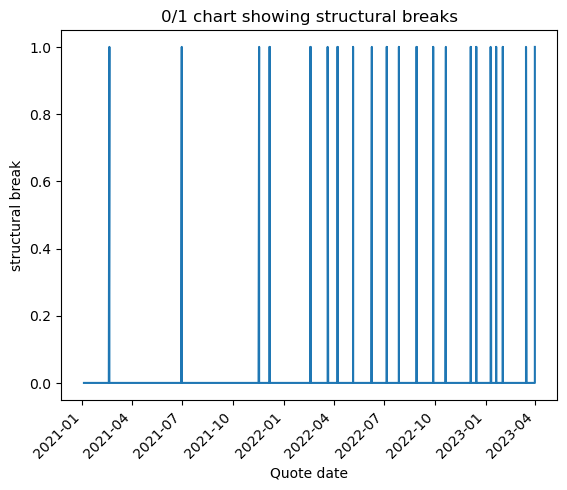

<Figure size 20000x12000 with 0 Axes>

In [193]:
print(my_bkps)
zoArr = [0 for i in range(len(points))]
xArr = [i for i in range(len(points))]

result = my_bkps
arr = result
print(arr)
for i in arr:
    zoArr[i - 1] = 2
zoArr
plt.plot(dates,zoArr)
plt.xticks(rotation=45, ha='right')
plt.ylabel("structural break")
plt.xlabel("Quote date")
plt.title("0/1 chart showing structural breaks")
plt.figure(figsize=(200,120))

dates = np.array(df70['QUOTE_DATE'])
for i in arr:
    print("Structural Break on : {date}".format(date=dates[i - 1]))
difference_array = [0 for x in range(len(result) - 1)]
for i in range(0, len(result) - 1):
    difference_array[i] = result[i + 1] - result[i]
print(zoArr)    

In [194]:
df70['zoArr'] = zoArr
df70

,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_IV,C_LAST,C_SIZE,C_BID,C_ASK,STRIKE,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,zoArr
0,1609794000,2021-01-04 16:00,2021-01-04,129.45,2023-03-17,1679083200,801.96,0.40312,65.0,8 x 60,63.51,64.15,70.0,59.4,0.459,0
1,1609794000,2021-01-04 16:00,2021-01-04,129.45,2023-01-20,1674248400,746.00,0.39221,66.5,98 x 236,62.50,63.65,70.0,59.4,0.459,0
2,1609880400,2021-01-05 16:00,2021-01-05,130.95,2023-03-17,1679083200,800.96,0.40716,65.7,274 x 455,63.94,66.65,70.0,60.9,0.465,0
3,1609880400,2021-01-05 16:00,2021-01-05,130.95,2023-01-20,1674248400,745.00,0.39743,66.5,10 x 2,64.01,65.15,70.0,60.9,0.465,0
4,1609966800,2021-01-06 16:00,2021-01-06,126.66,2023-03-17,1679083200,799.96,0.40683,64.32,107 x 170,59.85,62.95,70.0,56.7,0.447,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065,1680292800,2023-03-31 16:00,2023-03-31,164.84,2023-04-06,1680811200,6.00,4.42831,0.0,90 x 1,94.30,95.9,70.0,94.8,0.575,0
3066,1680292800,2023-03-31 16:00,2023-03-31,164.84,2023-03-31,1680292800,0.00,16.15260,0.0,90 x 90,93.55,96.25,70.0,94.8,0.575,0
3067,1680292800,2023-03-31 16:00,2023-03-31,164.84,2023-12-15,1702674000,259.04,0.58767,78.68,1 x 7,94.90,98.55,70.0,94.8,0.575,0
3068,1680292800,2023-03-31 16:00,2023-03-31,164.84,2023-05-12,1683921600,42.00,1.27480,0.0,7 x 3,93.20,97.15,70.0,94.8,0.575,0


In [195]:
# Setting up the train data parameters
bid_prices = np.array(df70['zoArr'])
values = bid_prices
rnnN = 40
training_data_len = math.ceil(len(values)* 0.8)
# training_data_len = result[-2] - 15

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(rnnN, len(train_data)):
    x_train.append(train_data[i-rnnN:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scaled_data[training_data_len-rnnN: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(rnnN, len(test_data)):
  x_test.append(test_data[i-rnnN:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [196]:
# Training the LSTM
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 40, 100)           40800     
                                                                 
 lstm_31 (LSTM)              (None, 100)               80400     
                                                                 
 dense_30 (Dense)            (None, 25)                2525      
                                                                 
 dense_31 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3
2416/2416 [==============================] - 18s 7ms/step - loss: 0.0078
Epoch 2/3
2416/2416 [==============================] - 16s 7ms

0.004895772979100287

In [197]:
# print(predictions)
# predcopy = predictions
# predict = []
# for i in predictions:
#     for j in i:
#         predict.append(int(j))

0.40810788


/var/folders/xz/p8m06xr55dv4n40tlgm3jl880000gn/T/ipykernel_27154/3767342064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


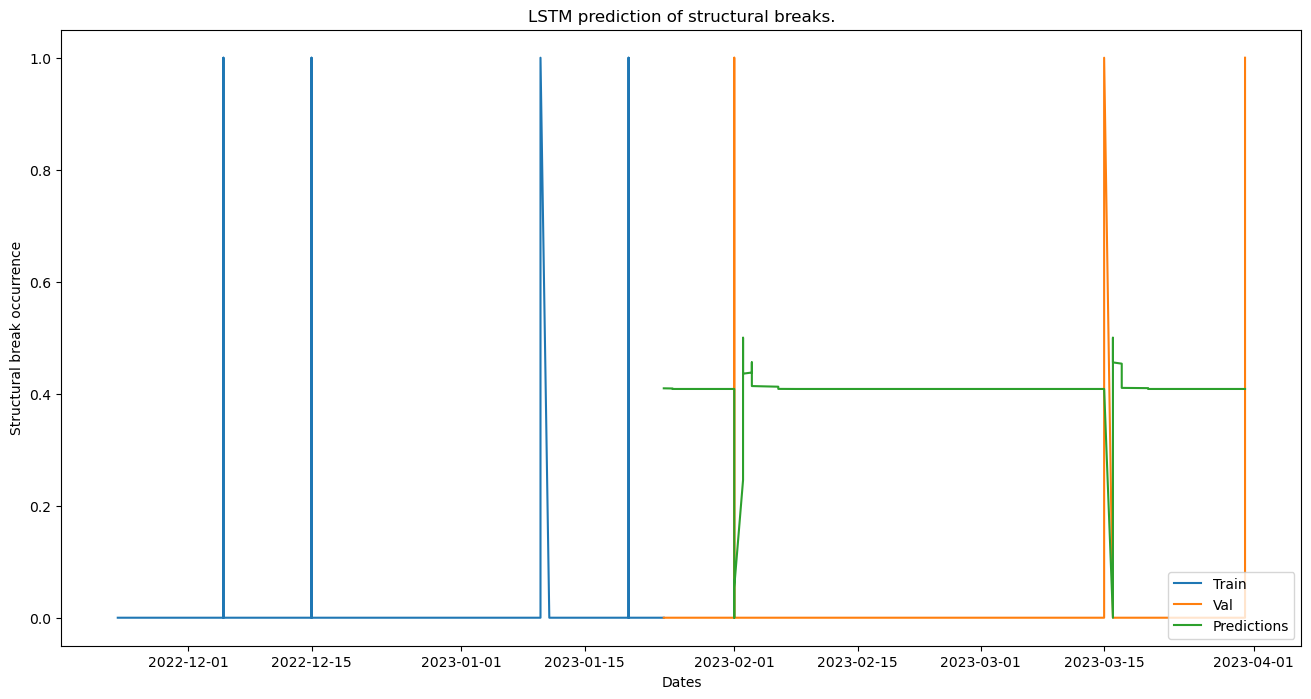

In [203]:
# remove
arr = predictions
start = 0
end = 0.5
width = end - start
res = (arr - arr.min())/(arr.max() - arr.min()) * width + start
# print(res)
predictions = res



# Plotting the LSTM results
data = df70.filter(['zoArr'])
dates =  df70.filter(['QUOTE_DATE'])

train_dates = dates[training_data_len - 500:training_data_len]
train = data[training_data_len - 500:training_data_len]

validation = data[training_data_len:]
validation_dates = dates[training_data_len:]
validation['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('LSTM prediction of structural breaks.') 
plt.xlabel('Dates')
plt.ylabel('Structural break occurrence')
plt.plot(train_dates, train)
plt.plot(validation_dates, validation[['zoArr', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
scaler = MinMaxScaler(feature_range=(0,100))

# scaled_data = scaler.fit_transform(predictions.reshape(0,100))
# print(predictions)

# arr = predictions
# start = 0
# end = 0.5
# width = end - start
# res = (arr - arr.min())/(arr.max() - arr.min()) * width + start
# print(res)
print(np.mean(arr))